In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("salaries_clean.csv",encoding="latin_1")
df.head()

,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,1,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,NaN,13.0,2.0,125000.0,5000.0,0.0,5000 shares,Don't work here.,3/21/16 12:58
1,3,walmart,"bentonville, ar",AR,US,36.36,-94.20,senior developer,Software,Senior,15.0,8.0,65000.0,NaN,5000.0,"3,000",NaN,3/21/16 12:58
2,4,vertical knowledge,"cleveland, oh",OH,US,41.47,-81.67,software engineer,Software,NaN,4.0,1.0,86000.0,5000.0,6000.0,0,NaN,3/21/16 12:59
3,6,netapp,waltham,NaN,NaN,NaN,NaN,mts,Other,NaN,4.0,0.0,105000.0,5000.0,8500.0,0,NaN,3/21/16 13:00
4,12,apple,cupertino,NaN,NaN,NaN,NaN,software engineer,Software,NaN,4.0,3.0,110000.0,5000.0,7000.0,150000,NaN,3/21/16 13:02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary_id                  1655 non-null   int64  
 1   employer_name              1651 non-null   object 
 2   location_name              1655 non-null   object 
 3   location_state             558 non-null    object 
 4   location_country           792 non-null    object 
 5   location_latitude          792 non-null    float64
 6   location_longitude         792 non-null    float64
 7   job_title                  1655 non-null   object 
 8   job_title_category         1655 non-null   object 
 9   job_title_rank             425 non-null    object 
 10  total_experience_years     1608 non-null   float64
 11  employer_experience_years  1608 non-null   float64
 12  annual_base_pay            1651 non-null   float64
 13  signing_bonus              1332 non-null   float

In [6]:
df.describe()

,salary_id,location_latitude,location_longitude,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
count,1655.000000,792.000000,792.000000,1608.000000,1608.000000,1.651000e+03,1.332000e+03,1.336000e+03
mean,1684.100906,37.754394,-64.712273,6.756113,2.656163,6.325004e+06,2.240563e+04,1.177552e+04
std,932.901390,16.740905,67.090364,5.687004,3.301834,2.461353e+08,3.097990e+05,6.921569e+04
min,1.000000,-41.000000,-123.270000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,897.000000,37.410000,-102.702500,3.000000,1.000000,6.100000e+04,0.000000e+00,0.000000e+00
50%,1711.000000,38.580000,-95.000000,5.000000,2.000000,9.948000e+04,0.000000e+00,5.000000e+02
75%,2477.000000,45.440000,-64.562500,10.000000,3.000000,1.300000e+05,5.000000e+03,1.000000e+04
max,3298.000000,65.000000,174.000000,56.000000,58.000000,1.000000e+10,8.999999e+06,2.000000e+06


In [7]:
df.isna().sum()

salary_id                       0
employer_name                   4
location_name                   0
location_state               1097
location_country              863
location_latitude             863
location_longitude            863
job_title                       0
job_title_category              0
job_title_rank               1230
total_experience_years         47
employer_experience_years      47
annual_base_pay                 4
signing_bonus                 323
annual_bonus                  319
stock_value_bonus             409
comments                     1363
submitted_at                    0
dtype: int64

In [8]:
df.shape

(1655, 18)

In [9]:
print("Empty values %", round(df.isnull().sum().sum()) / (len(df) *len(df.columns))*100)

Empty values % 24.947969117153406


<Axes: >

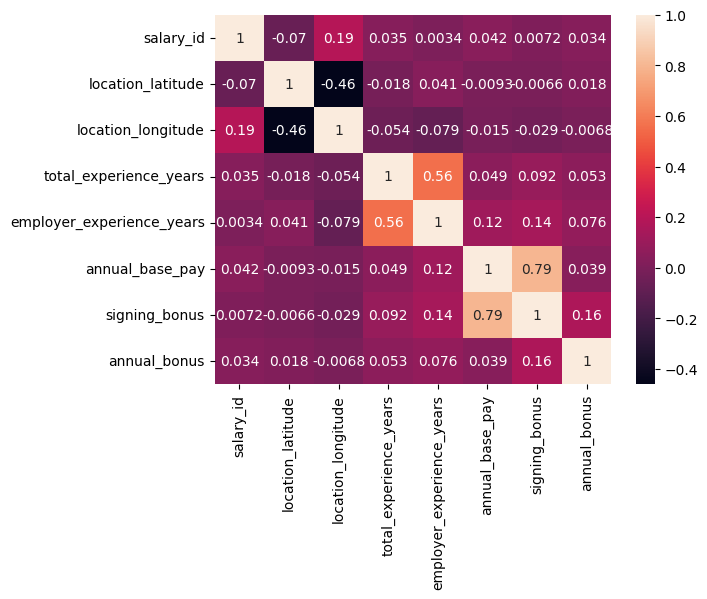

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [11]:
df.columns

Index(['salary_id', 'employer_name', 'location_name', 'location_state',
       'location_country', 'location_latitude', 'location_longitude',
       'job_title', 'job_title_category', 'job_title_rank',
       'total_experience_years', 'employer_experience_years',
       'annual_base_pay', 'signing_bonus', 'annual_bonus', 'stock_value_bonus',
       'comments', 'submitted_at'],
      dtype='object')

In [12]:
df=df.drop(['location_name','location_state',
            'location_country','location_latitude','location_longitude',
               'job_title_rank','comments','submitted_at','stock_value_bonus'], axis=1)

In [13]:
df.head()

,salary_id,employer_name,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
0,1,opower,systems engineer,Engineering,13.0,2.0,125000.0,5000.0,0.0
1,3,walmart,senior developer,Software,15.0,8.0,65000.0,NaN,5000.0
2,4,vertical knowledge,software engineer,Software,4.0,1.0,86000.0,5000.0,6000.0
3,6,netapp,mts,Other,4.0,0.0,105000.0,5000.0,8500.0
4,12,apple,software engineer,Software,4.0,3.0,110000.0,5000.0,7000.0


In [14]:
df.columns

Index(['salary_id', 'employer_name', 'job_title', 'job_title_category',
       'total_experience_years', 'employer_experience_years',
       'annual_base_pay', 'signing_bonus', 'annual_bonus'],
      dtype='object')

In [15]:
df = df.dropna(subset=["employer_name","annual_base_pay"])

In [16]:
df.isna().sum()

salary_id                      0
employer_name                  0
job_title                      0
job_title_category             0
total_experience_years        44
employer_experience_years     44
annual_base_pay                0
signing_bonus                318
annual_bonus                 314
dtype: int64

In [17]:
df[["signing_bonus","annual_bonus"]] = df[["signing_bonus","annual_bonus"]].fillna(0)

In [22]:
df[["total_experience_years",
    "employer_experience_years"]] = df[["total_experience_years",
                                    "employer_experience_years"]].fillna(round(df[["total_experience_years",
                                    "employer_experience_years"]].mean()))

In [23]:
df.isna().sum()

salary_id                    0
employer_name                0
job_title                    0
job_title_category           0
total_experience_years       0
employer_experience_years    0
annual_base_pay              0
signing_bonus                0
annual_bonus                 0
dtype: int64

In [24]:
df["annual_base_pay"].sort_values()

1143          0.0
1361          0.0
382           0.0
18           24.0
306          28.0
          ...    
1179    1200000.0
639     1234555.0
539     1250000.0
1111    1400000.0
1250    1500000.0
Name: annual_base_pay, Length: 1635, dtype: float64

In [25]:
df = df[(df["annual_base_pay"] < 2000000)]
df

,salary_id,employer_name,job_title,job_title_category,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
0,1,opower,systems engineer,Engineering,13.0,2.0,125000.0,5000.0,0.0
1,3,walmart,senior developer,Software,15.0,8.0,65000.0,0.0,5000.0
2,4,vertical knowledge,software engineer,Software,4.0,1.0,86000.0,5000.0,6000.0
3,6,netapp,mts,Other,4.0,0.0,105000.0,5000.0,8500.0
4,12,apple,software engineer,Software,4.0,3.0,110000.0,5000.0,7000.0
...,...,...,...,...,...,...,...,...,...
1650,3289,sparkfun electronics,junior software developer,Software,1.0,0.5,60500.0,0.0,800.0
1651,3290,intel,staff software enginer,Software,6.0,4.0,164000.0,0.0,20000.0
1652,3293,$2bn valuation tech company,sr. frontend eng,Web,7.0,1.0,150000.0,0.0,0.0
1653,3294,of maryland,scientific programmer (faculty research assist...,Applied Science,5.0,1.0,75000.0,0.0,0.0


In [27]:
df.rename(columns={
        "employer_name" : "company",
        "job_title" : "title",
        "job_title_category" : "catagory",
        "total_experience_years": "total_exp",
        "employer_experience_years" : "local_exp",
        "annual_base_pay" : "salary"
        

}, inplace= True)

In [34]:
df.tail(2)

,salary_id,company,title,catagory,total_exp,local_exp,salary,signing_bonus,annual_bonus
1653,3294,of maryland,scientific programmer (faculty research assist...,Applied Science,5.0,1.0,75000.0,0.0,0.0
1654,3298,linkedin,business analytics intern,Other,2.0,0.0,50.0,0.0,0.0


<Axes: xlabel='total_exp', ylabel='local_exp'>

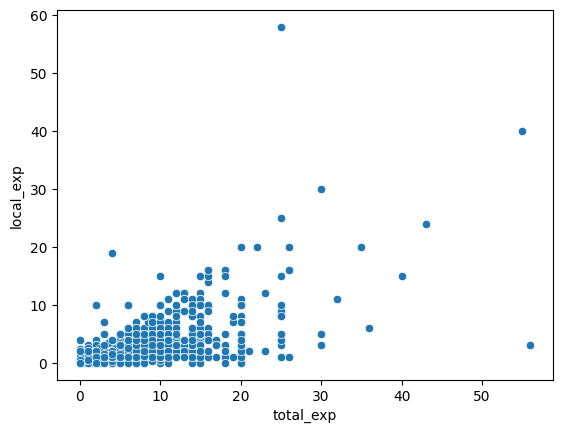

In [35]:
sns.scatterplot(data=df , x = "total_exp", y= "local_exp")

In [39]:
df["local_exp"].idxmax

<bound method Series.idxmax of 0       2.0
1       8.0
2       1.0
3       0.0
4       3.0
       ... 
1650    0.5
1651    4.0
1652    1.0
1653    1.0
1654    0.0
Name: local_exp, Length: 1635, dtype: float64>

In [40]:
df.loc[1596:1596]

,salary_id,company,title,catagory,total_exp,local_exp,salary,signing_bonus,annual_bonus
1596,3181,tom,tom,Other,25.0,58.0,250000.0,250478.0,150000.0


In [42]:
df[df["local_exp"] > df["total_exp"]].iloc[8:12]

,salary_id,company,title,catagory,total_exp,local_exp,salary,signing_bonus,annual_bonus
339,722,airbnb,software engineer,Software,0.0,1.0,110000.0,50000.0,0.0
347,737,microsoft,software engineer,Software,1.0,2.0,120000.0,200000.0,0.0
447,972,johns hopkins,phd student,Other,2.0,4.0,24000.0,0.0,0.0
605,1291,la michoacana,servidor de aguas,Other,3.0,7.0,48000.0,0.0,0.0


In [43]:
df = df[(df["local_exp"] -1 ) < df["total_exp"]]

<Axes: xlabel='total_exp', ylabel='local_exp'>

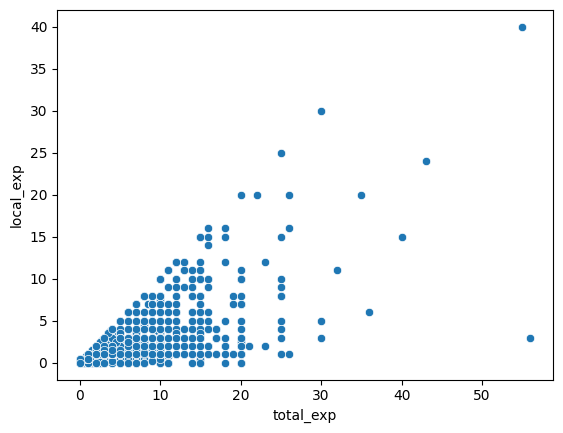

In [44]:
sns.scatterplot(data= df  , x = "total_exp" , y = "local_exp")

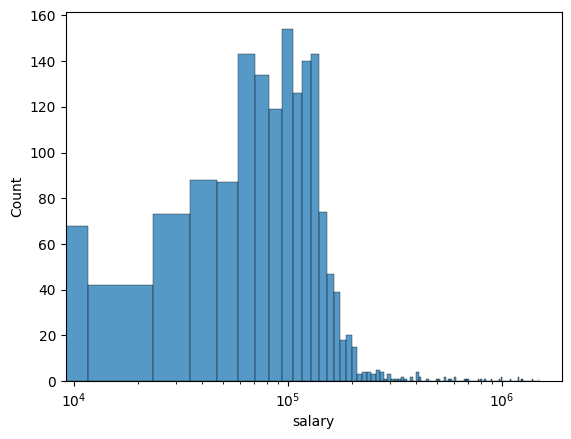

In [46]:
sns.histplot(data = df ,x= "salary")
plt.xscale("log")